## Student ID: 19012516 


# PCA and MNIST

1. Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)
2. Decompose the MNIST training dataset into its PCA components
3. Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITOUT RETRAINING THE NETWORK*
4. Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1)
5. Repeat step 3 using your new neural network from 4)
6. Finally repeat steps 4 and 5 using a network trained with the best 20 components

In [47]:
#copied from Week3_MNIST_TF.ipynb and Week5_PCA.ipynb

import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

#Set default figure size
mpl.rcParams['figure.figsize'] = [6.0, 4.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=train_images/255.0
test_images=test_images/255.0

#Copied from https://victorzhou.com/blog/keras-cnn-tutorial/
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

2.7.0


# Task 1
Adapted from Week 4 exercises, a fairly simple model was used for speed. It had one convolutional layer with 10 features and a (4,4) kernal, followed by a pooling layer (4,4) and a hidden layer 64 neurons wide.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 360)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                23104     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 23,924
Trainable params: 23,924
Non-trainable params: 0
__________________________________________________

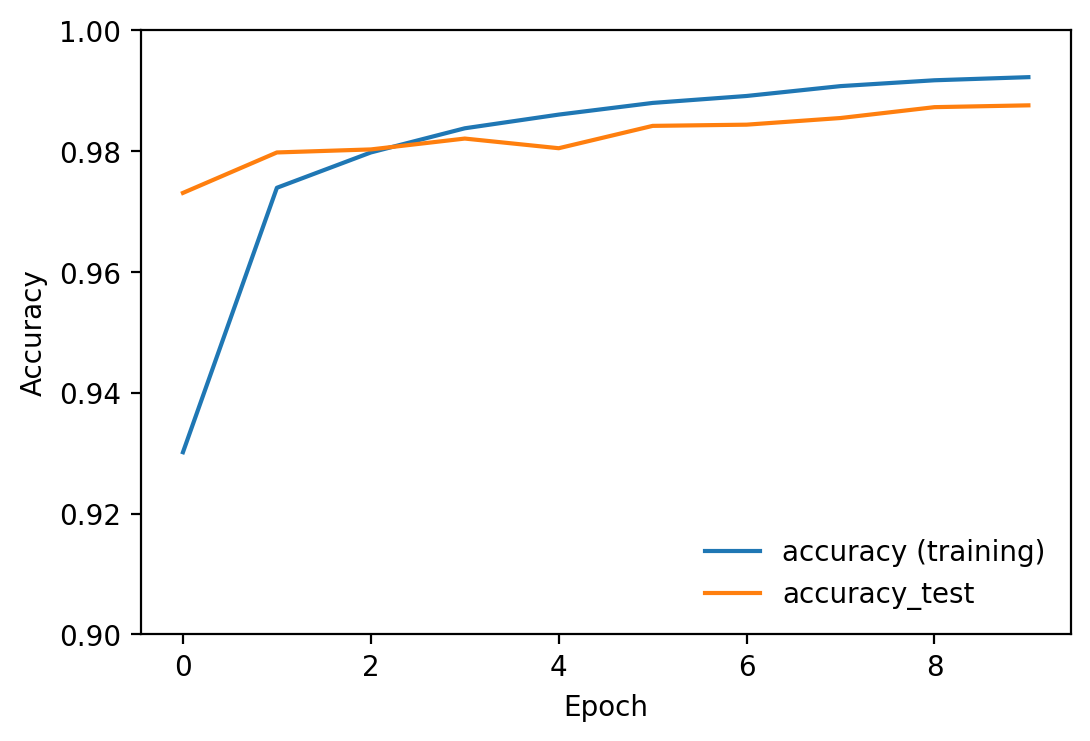

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

# Task 1 Conclusions
Test accuracy was 98.76%, so above the target of 95%. Task completed.

# Task 2
<p>First, it was required to return train_images and test_images to their original shape. This was achieved using np.squeeze.

In [49]:
#Adapted from https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html
train_images = np.squeeze(train_images, axis=3)
test_images = np.squeeze(test_images, axis=3)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Task 2
Then code from Week5_PCA.ipynb could be used to make covariance matrix and eigenvalues and eigenvectors for training_images.

In [50]:
#Copied from Week5_PCA.ipynb
print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)

#adapted from Week5_PCA.ipynb
P = np.dot(x, vecs)

train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


# Task 2
Then it was helpful to see if it had worked, adapting some of the plots from Week5_PCA.ipynb

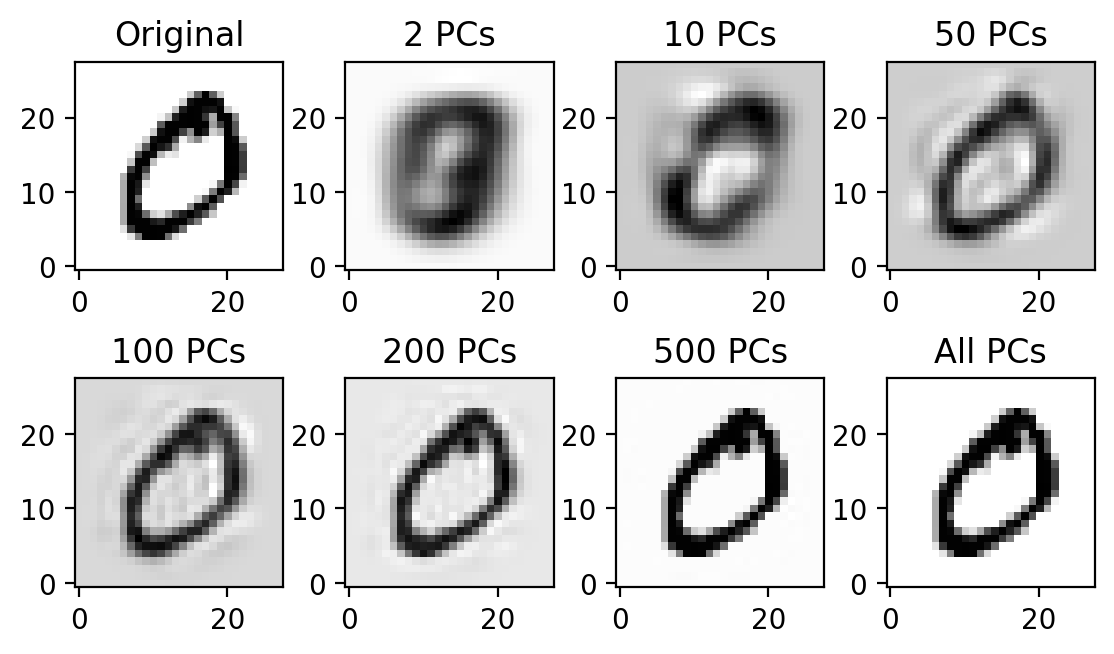

In [54]:
#to test it is working
#adapted from Week5_PCA.ipynb
newImage2=(np.dot(P[:,0:2],vecs.T[0:2,:]))+mu
newImage10=(np.dot(P[:,0:10],vecs.T[0:10,:]))+mu
newImage50=(np.dot(P[:,0:50],vecs.T[0:50,:]))+mu
newImage100=(np.dot(P[:,0:100],vecs.T[0:100,:]))+mu
newImage200=(np.dot(P[:,0:200],vecs.T[0:200,:]))+mu
newImage500=(np.dot(P[:,0:500],vecs.T[0:500,:]))+mu
newImage784=(np.dot(P[:,:],vecs.T[:,:]))+mu

#adapted from Week5_PCA.ipynb
fig,ax=plt.subplots(2,4)
whichImage=1
ax[0,0].imshow(np.flipud(np.reshape(X[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,0].set_title("Original")
ax[0,1].imshow(np.flipud(np.reshape(newImage2[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,1].set_title("2 PCs")
ax[0,2].imshow(np.flipud(np.reshape(newImage10[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,2].set_title("10 PCs")
ax[0,3].imshow(np.flipud(np.reshape(newImage50[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,3].set_title("50 PCs")
ax[1,0].imshow(np.flipud(np.reshape(newImage100[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,0].set_title("100 PCs")
ax[1,1].imshow(np.flipud(np.reshape(newImage200[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,1].set_title("200 PCs")
ax[1,2].imshow(np.flipud(np.reshape(newImage500[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,2].set_title("500 PCs")
ax[1,3].imshow(np.flipud(np.reshape(newImage784[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,3].set_title("All PCs")
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)



# Task 2
The above images suggest that the components have been correctly calculated on the training_sample. As we saw in Week5_PCA.ipynb, the "All PCs" image is the same as the original, which is the case here. Task completed.

# Task 3
First, produce a new matrix P_test, using the test image dataset and test it



In [55]:
X_test=np.reshape(test_images,(10000,784))
print("X_test.shape:",np.shape(X_test))
mu_test=np.mean(X_test,axis=0)
x_test=X_test-mu
P_test = np.dot(x_test, vecs)

X_test.shape: (10000, 784)


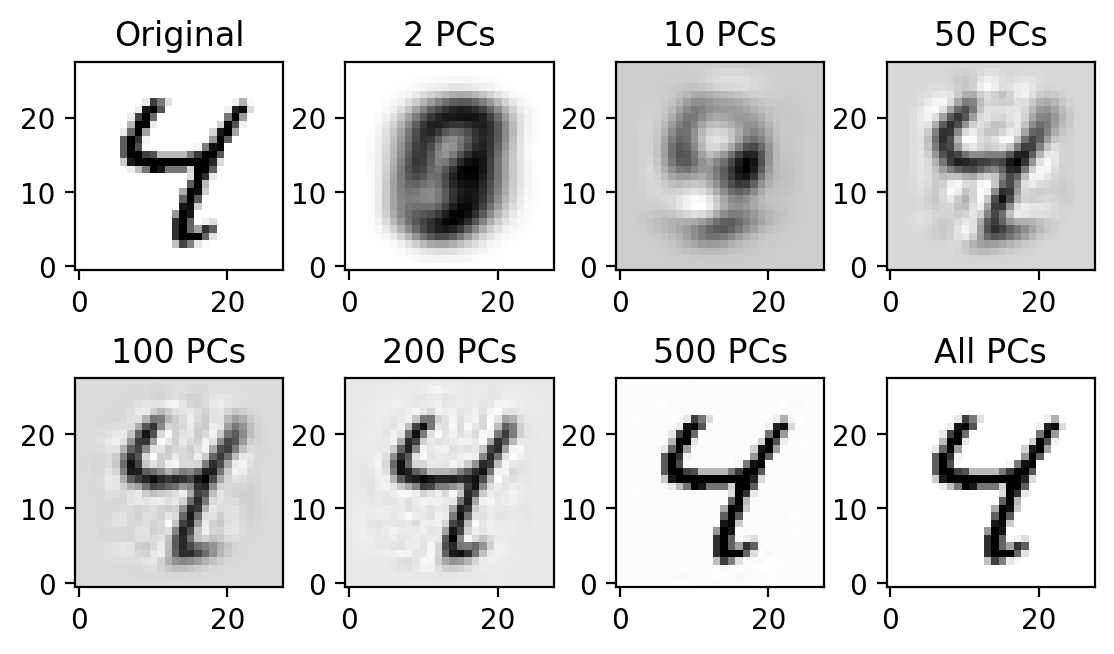

In [56]:
#to test it is working
#adapted from Week5_PCA.ipynb
newImage2=(np.dot(P_test[:,0:2],vecs.T[0:2,:]))+mu
newImage10=(np.dot(P_test[:,0:10],vecs.T[0:10,:]))+mu
newImage50=(np.dot(P_test[:,0:50],vecs.T[0:50,:]))+mu
newImage100=(np.dot(P_test[:,0:100],vecs.T[0:100,:]))+mu
newImage200=(np.dot(P_test[:,0:200],vecs.T[0:200,:]))+mu
newImage500=(np.dot(P_test[:,0:500],vecs.T[0:500,:]))+mu
newImage784=(np.dot(P_test[:,:],vecs.T[:,:]))+mu

#adapted from Week5_PCA.ipynb
fig,ax=plt.subplots(2,4)
whichImage=6
ax[0,0].imshow(np.flipud(np.reshape(X_test[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,0].set_title("Original")
ax[0,1].imshow(np.flipud(np.reshape(newImage2[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,1].set_title("2 PCs")
ax[0,2].imshow(np.flipud(np.reshape(newImage10[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,2].set_title("10 PCs")
ax[0,3].imshow(np.flipud(np.reshape(newImage50[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,3].set_title("50 PCs")
ax[1,0].imshow(np.flipud(np.reshape(newImage100[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,0].set_title("100 PCs")
ax[1,1].imshow(np.flipud(np.reshape(newImage200[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,1].set_title("200 PCs")
ax[1,2].imshow(np.flipud(np.reshape(newImage500[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,2].set_title("500 PCs")
ax[1,3].imshow(np.flipud(np.reshape(newImage784[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,3].set_title("All PCs")
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)



# Task 3
Loop through N = 0 to 783. To create in turn a testing dataset with N of the PCs selected. Use each of these to evaluate the model and plot test accuracy versus testing accuracy.


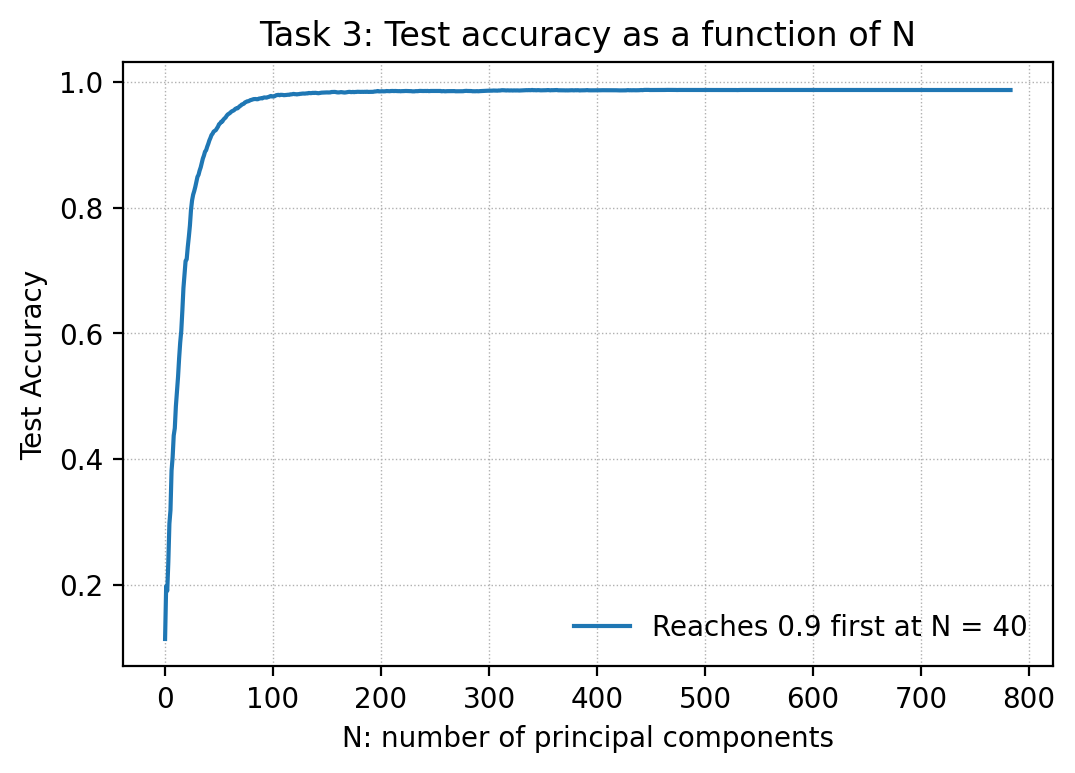

In [57]:
N_array = np.arange(784)
acc_array =np.array([])
for i in N_array:
  newImage=(np.dot(P_test[:,0:i],vecs.T[0:i,:]))+mu
  newImage = np.reshape(newImage, (10000,28,28))
  newImage = np.expand_dims(newImage, axis=3)
  test_loss, test_acc = model.evaluate(newImage,  test_labels, verbose=0)
  acc_array = np.append(acc_array, test_acc)
fig, ax = plt.subplots()
if np.max(acc_array) >= 0.9:
  acc_90 = np.where(acc_array>=0.9)[0][0]
  ax.plot(N_array, acc_array, label = f'Reaches 0.9 first at N = {acc_90}')
else:
  ax.plot(N_array, acc_array, label = 'Never reaches 0.9')
ax.set_title('Task 3: Test accuracy as a function of N')
ax.set_xlabel('N: number of principal components')
ax.set_ylabel('Test Accuracy')
ax.legend()
ax.grid(linewidth='0.5', linestyle ='dotted');


In [58]:
print(acc_array[-1])

0.9876000285148621


# Task 3
N starts at zero with one PC and its accuracy on the test sample is very low. As more components are added in, accuracy increases quickly, but then tails off until it reaches the 98.87% with all 784 PCs. This exactly matches the test accuracy we saw in Task 1, which is what we would expect. The test accuracy hits 90% after N = 40, which is 41 PCs (counting N=0).

# Task 4
Now, the first 100 PCA components were applied to train_sample.

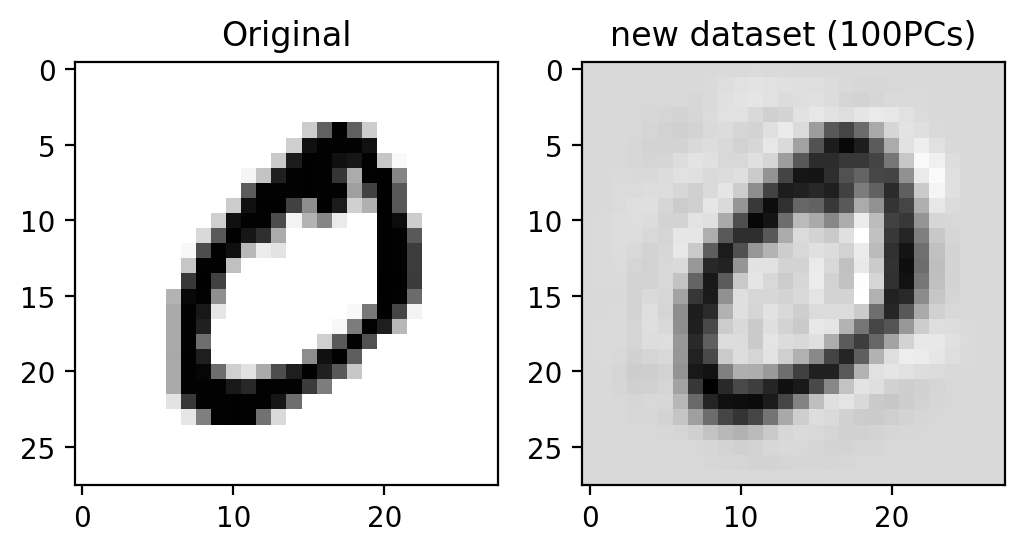

In [61]:
#adapted from Week5_PCA.ipynb
X_train=np.reshape(train_images,(60000,784))
mu_train=np.mean(X_train,axis=0)
X_train=X_train-mu_train
P_train = np.dot(X_train, vecs)
new_train_images=(np.dot(P_train[:,0:100],vecs.T[0:100,:]))+mu_train#apply on first 100PCs
new_train_images = np.reshape(new_train_images, (60000,28,28))

#test to see if it is working as expected
fig,ax=plt.subplots(1,2)
ax[0].imshow(train_images[1], cmap='binary')
ax[0].set_title("Original")
ax[1].imshow(new_train_images[1], cmap='binary')
ax[1].set_title("new dataset (100PCs)")
new_train_images = np.expand_dims(new_train_images, axis=3)

# Task 4
It looked like this has worked. Now the model was re-trained with this new training set.

In [63]:
print(new_train_images.shape)

(60000, 28, 28, 1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 360)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                23104     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 23,924
Trainable params: 23,924
Non-trainable params: 0
__________________________________________________

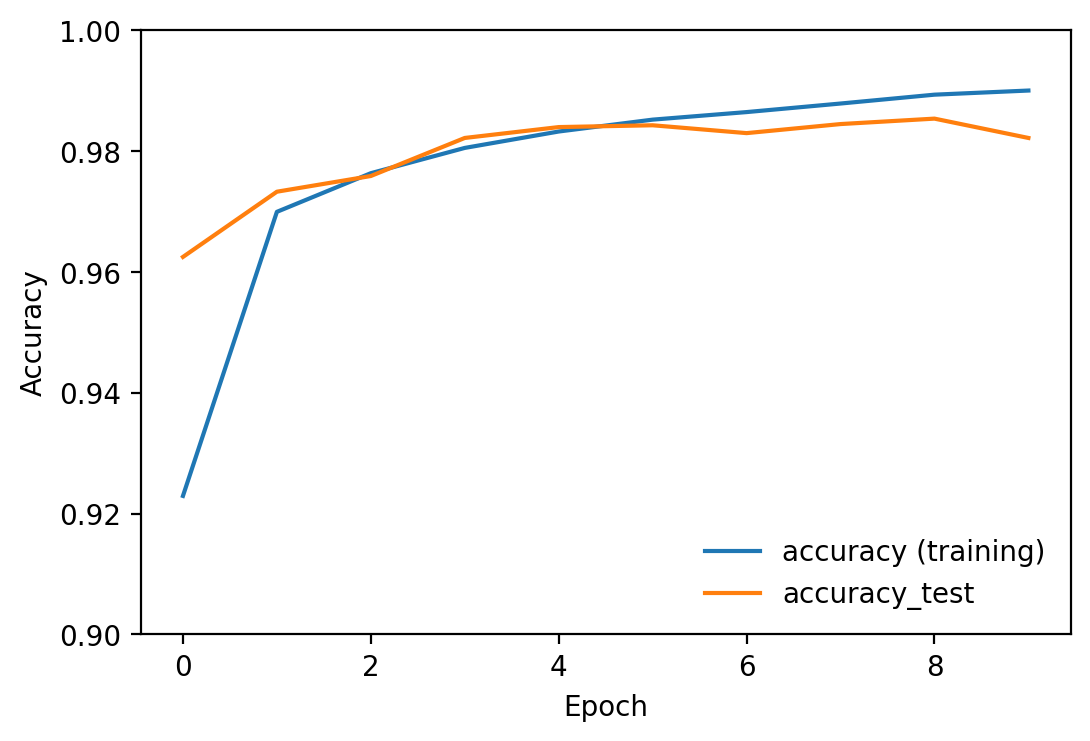

In [64]:
#fit new training set (100PCs) to same model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(new_train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

# Task 4
A decent test accuracy of 98.22%. As expected this is a little lower than when using all components in the training set (98.76%). 

# Task 5
Repeat Task 3.

In [66]:
#ensure image datasets are the right shape
new_train_images = np.squeeze(new_train_images, axis=3)
print(test_images.shape)
print(new_train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


new_train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


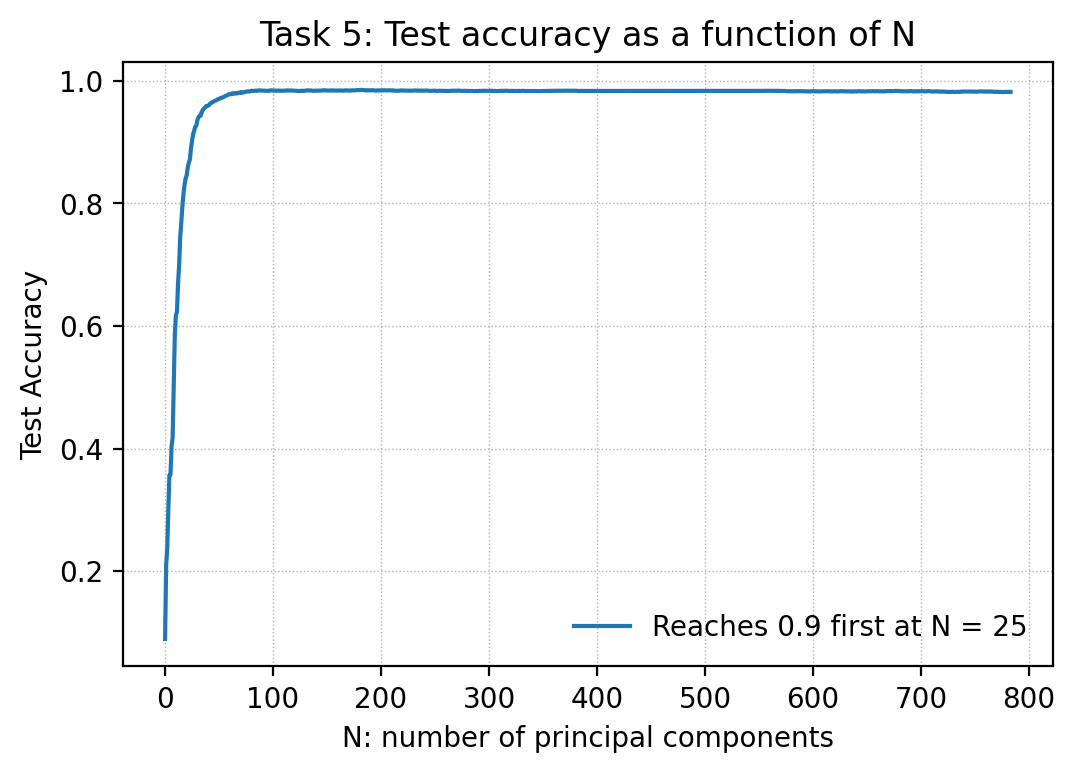

In [67]:
#Copied from Week5_PCA.ipynb
print("new_train_images.shape: ",np.shape(new_train_images))
X=np.reshape(new_train_images,(60000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
#rho=np.dot(np.transpose(x),x)  #Make the covaraince matrix by hand
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)

#adapted from Week5_PCA.ipynb
X_test=np.reshape(test_images,(10000,784))
mu_test=np.mean(X_test,axis=0)
X_test=X_test-mu_test
P_test = np.dot(X_test, vecs)

N_array = np.arange(784)
acc_array =np.array([])
for i in N_array:
  newImage=(np.dot(P_test[:,0:i],vecs.T[0:i,:]))+mu_test
  newImage = np.reshape(newImage, (10000,28,28))
  newImage = np.expand_dims(newImage, axis=3)
  test_loss, test_acc = model.evaluate(newImage,  test_labels, verbose=0)
  acc_array = np.append(acc_array, test_acc)
fig, ax = plt.subplots()
if np.max(acc_array) >= 0.9:
  acc_90 = np.where(acc_array>=0.9)[0][0]
  ax.plot(N_array, acc_array, label = f'Reaches 0.9 first at N = {acc_90}')
else:
  ax.plot(N_array, acc_array, label = 'Never reaches 0.9')
ax.set_title('Task 5: Test accuracy as a function of N')
ax.set_xlabel('N: number of principal components')
ax.set_ylabel('Test Accuracy')
ax.legend()
ax.grid(linewidth='0.5', linestyle ='dotted');


In [69]:
print(acc_array[-1])

0.9819999933242798


# Task 5.
Like in Task 3, the accuracy starts low for low N, rapidly increases and then tails off to end around the value the model had achieved in training (98.20% versus 98.22%). The main difference is the accuracy increases more rapidly at low N. So in Task 5, accuracy hits 90% after N= 25, or 26 PCs. In Task 3, it hit this level at N=40 or 41 PCs.

# Task 6.
Repeat but with only 20 PCs in training dataset.

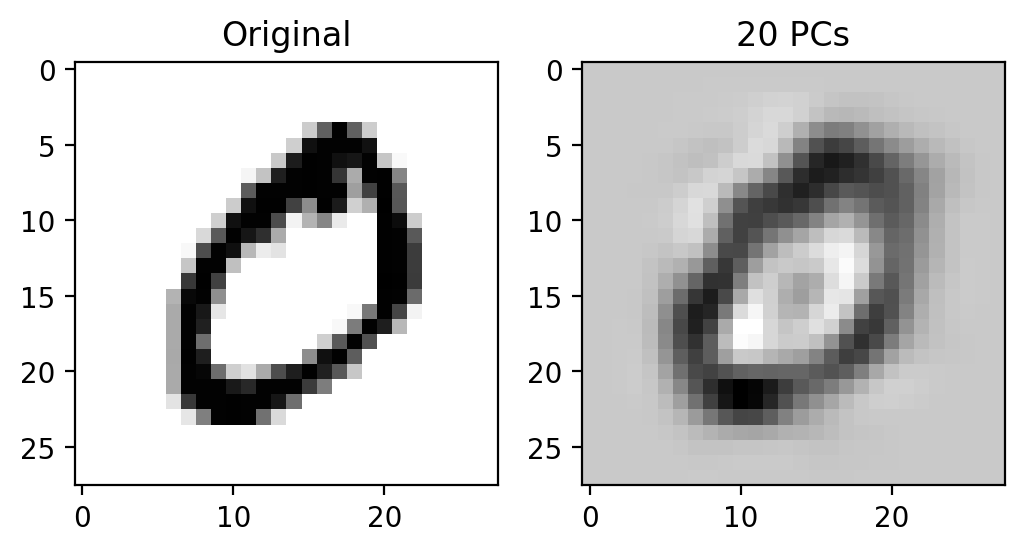

In [71]:
#adapted from Week5_PCA.ipynb
X_train=np.reshape(train_images,(60000,784))
mu_train=np.mean(X_train,axis=0)
X_train=X_train-mu_train
P_train = np.dot(X_train, vecs)

new_train_images=(np.dot(P_train[:,0:20],vecs.T[0:20,:]))+mu_train
new_train_images = np.reshape(new_train_images, (60000,28,28))
fig,ax=plt.subplots(1,2)
ax[0].imshow(train_images[1], cmap='binary')
ax[0].set_title("Original")
ax[1].imshow(new_train_images[1], cmap='binary')
ax[1].set_title("20 PCs")
new_train_images = np.expand_dims(new_train_images, axis=3)



In [73]:
test_images = np.expand_dims(test_images, axis=3)
print(test_images.shape)
print(new_train_images.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [74]:

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 360)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                23104     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 23,924
Trainable params: 23,924
Non-trainable params: 0
__________________________________________________

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3785 - accuracy: 0.8891 - val_loss: 0.5531 - val_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1758 - accuracy: 0.9457 - val_loss: 0.5047 - val_accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1406 - accuracy: 0.9565 - val_loss: 0.5376 - val_accuracy: 0.8603
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1220 - accuracy: 0.9614 - val_loss: 0.4880 - val_accuracy: 0.8725
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1098 - accuracy: 0.9659 - val_loss: 0.6097 - val_accuracy: 0.8513
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 0.5056 - val_accuracy: 0.8727
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0940 - accuracy: 0.9701 - val_loss: 0.6883 - val_ac

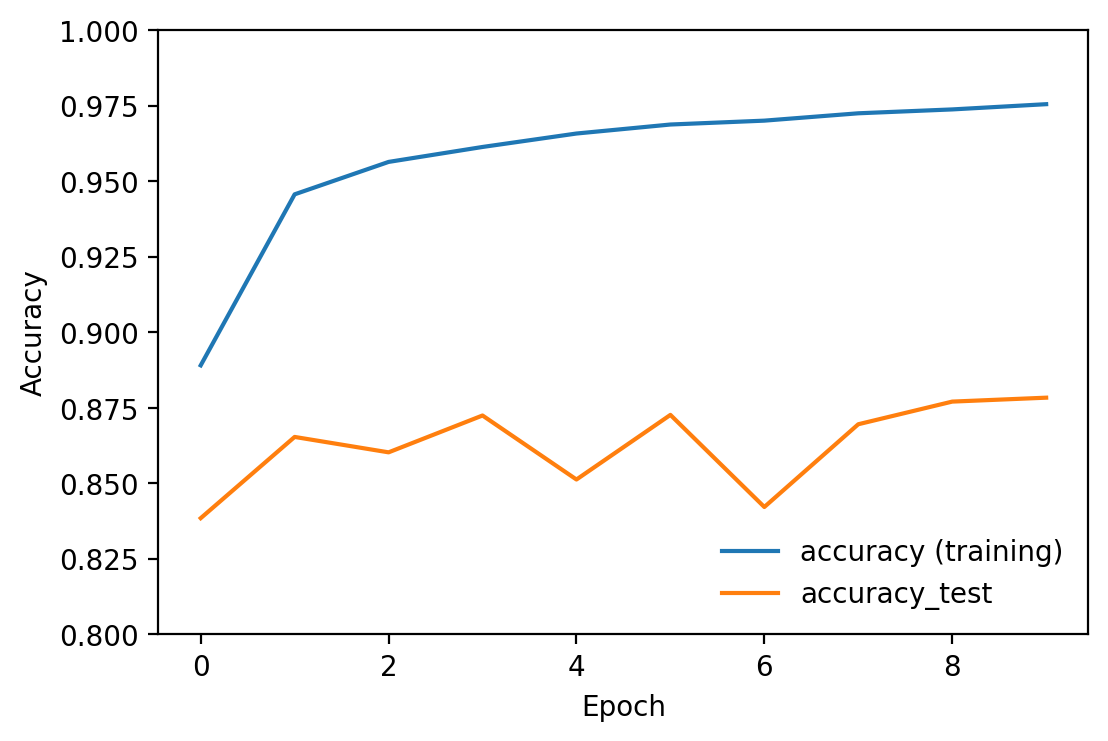

In [75]:

history = model.fit(new_train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

# Task 6
Given how grainy the images are using just 20 PCs, it is not surprising that the test accuracy on training the model is quite low (87.84%). Indeed, the x axis limits needed to expanded to show the plot; normally we have been working with test accuracies above 90%.

In [77]:
test_images = np.squeeze(test_images, axis = 3)
new_train_images = np.squeeze(new_train_images, axis=3)
print(test_images.shape)
print(new_train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


new_train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


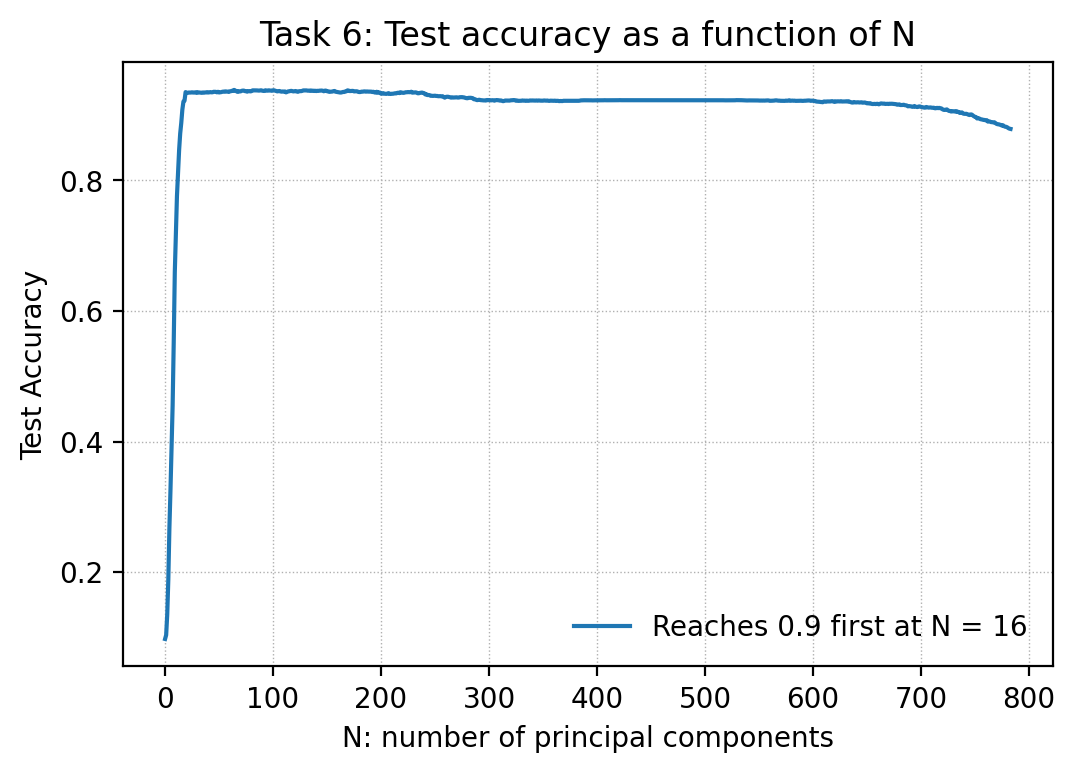

In [78]:
#Copied from Week5_PCA.ipynb
print("new_train_images.shape: ",np.shape(new_train_images))
X=np.reshape(new_train_images,(60000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
#rho=np.dot(np.transpose(x),x)  #Make the covaraince matrix by hand
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)

#adapted from Week5_PCA.ipynb
X_test=np.reshape(test_images,(10000,784))
mu_test=np.mean(X_test,axis=0)
X_test=X_test-mu_test
P_test = np.dot(X_test, vecs)

N_array = np.arange(784)
acc_array =np.array([])
for i in N_array:
  newImage=(np.dot(P_test[:,0:i],vecs.T[0:i,:]))+mu_test
  newImage = np.reshape(newImage, (10000,28,28))
  newImage = np.expand_dims(newImage, axis=3)
  test_loss, test_acc = model.evaluate(newImage,  test_labels, verbose=0)
  acc_array = np.append(acc_array, test_acc)
fig, ax = plt.subplots()
if np.max(acc_array) >= 0.9:
  acc_90 = np.where(acc_array>=0.9)[0][0]
  ax.plot(N_array, acc_array, label = f'Reaches 0.9 first at N = {acc_90}')
else:
  ax.plot(N_array, acc_array, label = 'Never reaches 0.9')
ax.set_title('Task 6: Test accuracy as a function of N')
ax.set_xlabel('N: number of principal components')
ax.set_ylabel('Test Accuracy')
ax.legend()
ax.grid(linewidth='0.5', linestyle ='dotted');


In [88]:
print(acc_array[-1])
print(np.max(acc_array))


0.8790000081062317
0.9387999773025513


# Task 6
With a training dataset reconstructed with just 20 PCs, the accuracy increased very quickly with N, exceeding it at N = 16 or 17 PCs. This is much quicker than previously. The accuracy peaked at 93.88% and then actually declined (suggesting overfitting) reaching 87.90% at 784 PCs. This ending value is at a similar level to model training test accuracy of 87.84%.

# Conclusions
PCA analysis can be used as a pre-processing stage to reduce the number of dimensions in the training data set. As has been seen, it is fast to compute using linear algebra. It can then be applied so that machine learning models converge earlier and quicker. In our examples:
<p>Test accuracy hit 90% when:
<p>All PCs included in training set (784): after 41 PCs applied to test dataset. 
<p>100 PCs included in training set: after 26 PCs applied to test dataset.
<p>20 PCs included in training set: after 17 PCs applied to test dataset.

The problem with using too few PCs in the training set is that the overall test accuracies converge on lower values than for more PCs. In our examples:
<p>All PCs converged on 98.76%.
<p>100 PCs converged on 98.20%.
<p>20. PCs converged in 87.90%.

There is a trade off between test accuracy and dimensionality reduction/ efficiency. In our examples, it could be decided that 100 PCs does not sacrifice too much in terms of test accuracy, but gains significantly from efficiency compared to the All PCs case. 20 PCs is probably too few for the MNIST database as the test accuracy is poor.



